In [4]:
! pip install wordclouds
! pip install nltk
! pip install seaborn
! pip install vaderSentiment
! pip install xlrd
! pip install python-dateutil
! pip install langdetect
! pip install unidecode

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import pandas as pd
from datetime import datetime
import re

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import itertools
import collections
import string
import dateutil

import networkx as nx
import os
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

ERROR: Could not find a version that satisfies the requirement wordclouds
ERROR: No matching distribution found for wordclouds


In [5]:
# 2018-2019 DATA

#df1 = pd.read_csv("brexit_2020.csv")
df2 = pd.read_csv("brexit_2019.csv")
df3 = pd.read_csv("brexit_2018.csv")
frames=[df2,df3]
df=pd.concat(frames)
df['Tweet'] = df['Tweet'].str.replace('\W', ' ', regex=True)

df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'], format="%Y-%m-%d %H:%M:%S")
df['Date_time'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df['Tweet'] = df['Tweet'].apply(str)
df['day'] = pd.DatetimeIndex(df['Date']).day
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year
df=df.dropna(axis=0)
df=df.set_index('Date')

df= df.sort_values("Date")
df

,User,Tweet,Date_time,day,month,year
Date,,,,,,
2018-01-01,damo_baker1,stephenfry Will the UK be a 51 Muslim Faith ...,2018-01-01 20:14:15+00:00,1.0,1.0,2018.0
2018-01-01,ACBellino,B1G Bowl update BIG10 is 7 1 Purdue 38 Ariz...,2018-01-01 20:43:19+00:00,1.0,1.0,2018.0
2018-01-01,lizziepanda,Stevos_uk PhilTaylor I really hope he wins b...,2018-01-01 20:43:33+00:00,1.0,1.0,2018.0
2018-01-01,alisonjardine,UK friends my best selling book is sold out ...,2018-01-01 20:43:33+00:00,1.0,1.0,2018.0
2018-01-01,V_Schuchter,franbig Exactly no one knows what the hell i...,2018-01-01 20:43:34+00:00,1.0,1.0,2018.0
...,...,...,...,...,...,...
2019-12-31,ArakapasHash,Well he is on the list of beneficiaries whet...,2019-12-31 16:03:04+00:00,31.0,12.0,2019.0
2019-12-31,Celt46123799,Soldieriain mature_student mollison_neil m...,2019-12-31 16:02:51+00:00,31.0,12.0,2019.0
2019-12-31,SpruceAndy,ajhanlaurence philt5116 Darren doesn t under...,2019-12-31 16:02:07+00:00,31.0,12.0,2019.0


In [6]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [7]:
# Removing stop words
stop_words = stopwords.words("english")

df['Tweets_clean'] = df['Tweet'].apply(lambda x: ' '.join([item for item in x.split()
                                                                  if item not in stop_words]))
df['Tweets_clean'] = df['Tweets_clean'].str.replace('\d+', '')

df["Tweets_clean"]

<ipython-input-7-a6008cec8d3a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweets_clean'] = df['Tweets_clean'].str.replace('\d+', '')


Date
2018-01-01    stephenfry Will UK  Muslim Faith land mass  pr...
2018-01-01    BG Bowl update BIG   Purdue  Arizona  Iowa  BC...
2018-01-01    Stevos_uk PhilTaylor I really hope wins Cross ...
2018-01-01    UK friends best selling book sold Amazon order...
2018-01-01    franbig Exactly one knows hell around I watche...
                                    ...                        
2019-12-31    Well list beneficiaries whether qualifies But ...
2019-12-31    Soldieriain mature_student mollison_neil mrjam...
2019-12-31    ajhanlaurence philt Darren understand NATO Oh ...
2019-12-31          Even Brexit makes SaintsFC fans forget cunt
2019-12-31    UK Government Brexit App Is A Security Nightma...
Name: Tweets_clean, Length: 1456293, dtype: object

In [8]:
# TOKENIZATION
tt = TweetTokenizer()
df['Tweets_clean'] = df['Tweets_clean'].apply(str)
df["Tweets_clean"] = df["Tweets_clean"].apply(tt.tokenize)

lmtzr = WordNetLemmatizer()

df["Tweets_clean"] = df["Tweets_clean"].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])
df['Tweets_clean'] = df['Tweets_clean'].apply(str)
import re
p = re.compile(r'[^\w\s]+')
df["Tweets_clean"] = [p.sub('', x) for x in df["Tweets_clean"].tolist()]

#df["Tweets_clean"] = df["Tweets_clean"].str.replace('[^\w\s]','')
df["Tweets_clean"]

Date
2018-01-01    stephenfry Will UK Muslim Faith land mass pred...
2018-01-01    BG Bowl update BIG Purdue Arizona Iowa BC MSU ...
2018-01-01    Stevos_uk PhilTaylor I really hope win Cross l...
2018-01-01    UK friend best selling book sold Amazon order ...
2018-01-01    franbig Exactly one know hell around I watched...
                                    ...                        
2019-12-31    Well list beneficiary whether qualifies But I ...
2019-12-31    Soldieriain mature_student mollison_neil mrjam...
2019-12-31    ajhanlaurence philt Darren understand NATO Oh ...
2019-12-31            Even Brexit make SaintsFC fan forget cunt
2019-12-31    UK Government Brexit App Is A Security Nightma...
Name: Tweets_clean, Length: 1456293, dtype: object

In [9]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

df_no_urls = [remove_url(text) for text in df['Tweets_clean']]
df_no_urls[:1]

lower_case = [word.lower() for word in df['Tweets_clean']]
sentences = df['Tweets_clean']

df_no_urls[0].split()

words_in_df = [text.lower().split() for text in df_no_urls]
words_in_df[:2]

[['stephenfry',
  'will',
  'uk',
  'muslim',
  'faith',
  'land',
  'mass',
  'prediction',
  'statistically',
  'predict',
  'sir',
  'this',
  'second',
  'time',
  'i',
  'asked',
  'sir',
  'x'],
 ['bg',
  'bowl',
  'update',
  'big',
  'purdue',
  'arizona',
  'iowa',
  'bc',
  'msu',
  'wsu',
  'n',
  'western',
  'uk',
  'osu',
  'usc',
  'psu',
  'wash',
  'wisc',
  'miami',
  's',
  'carolina',
  'um']]

In [10]:
# second cleaning 
stop_words = stopwords.words('english')
# Remove stop words from each list of words
df_nsw = [[word for word in df_words if not word in stop_words]
              for df_words in words_in_df]
df_nsw

[['stephenfry',
  'uk',
  'muslim',
  'faith',
  'land',
  'mass',
  'prediction',
  'statistically',
  'predict',
  'sir',
  'second',
  'time',
  'asked',
  'sir',
  'x'],
 ['bg',
  'bowl',
  'update',
  'big',
  'purdue',
  'arizona',
  'iowa',
  'bc',
  'msu',
  'wsu',
  'n',
  'western',
  'uk',
  'osu',
  'usc',
  'psu',
  'wash',
  'wisc',
  'miami',
  'carolina',
  'um'],
 ['stevosuk',
  'philtaylor',
  'really',
  'hope',
  'win',
  'cross',
  'looking',
  'good'],
 ['uk',
  'friend',
  'best',
  'selling',
  'book',
  'sold',
  'amazon',
  'order',
  'today',
  'back',
  'stock',
  'couple',
  'day',
  'learn',
  'make',
  'art',
  'ipad',
  'android',
  'tablet',
  'touch',
  'screen',
  'device',
  'got',
  'christmas',
  'http',
  'co',
  'ozsxdfzz'],
 ['franbig',
  'exactly',
  'one',
  'know',
  'hell',
  'around',
  'watched',
  'year',
  'ago',
  'got',
  'many',
  'question',
  'uk',
  'canada',
  'haha'],
 ['nowplaying', 'garbage', 'sex', 'enemy', 'atlantic', 'radio'

In [14]:
# Flatten list of words
all_words_nsw_nc = list(itertools.chain(*df_nsw))

# Create counter of words
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(20)

[('brexit', 876424),
 ('uk', 703560),
 ('co', 413032),
 ('http', 406483),
 ('eu', 199094),
 ('amp', 163578),
 ('deal', 151751),
 ('people', 147390),
 ('party', 125308),
 ('one', 122744),
 ('get', 114529),
 ('like', 108465),
 ('vote', 108404),
 ('would', 104013),
 ('think', 95753),
 ('u', 92227),
 ('want', 90516),
 ('time', 86283),
 ('country', 85638),
 ('labour', 84023)]

In [15]:
clean_df_ncw = pd.DataFrame(counts_nsw_nc.most_common(100),
                             columns=['words', 'count'])
clean_df_ncw

,words,count
0,brexit,876424
1,uk,703560
2,co,413032
3,http,406483
4,eu,199094
...,...,...
95,next,27391
96,must,27349
97,yes,27097
98,borisjohnson,27006


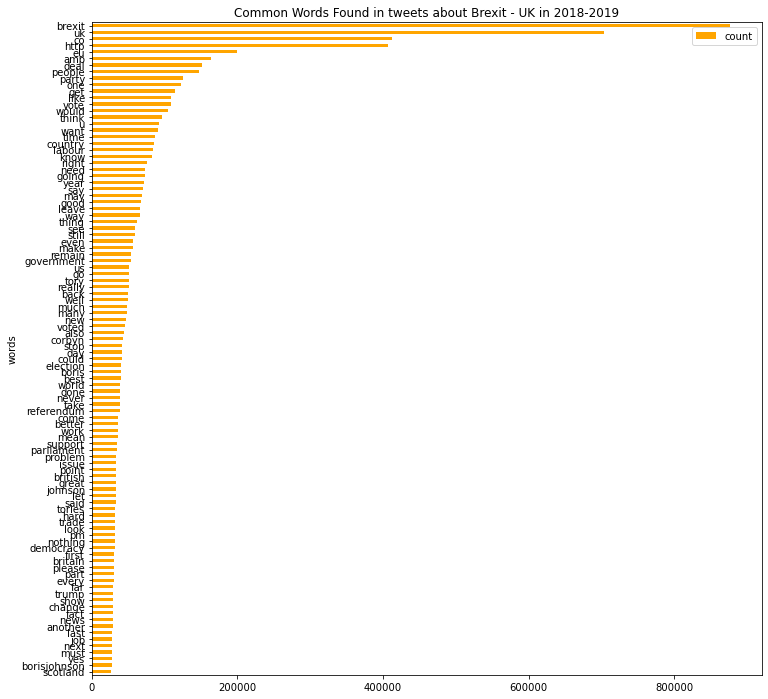

In [16]:
# plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
clean_df_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Words Found in tweets about Brexit - UK in 2018-2019")

plt.show()

In [19]:
text = clean_df_ncw.iloc[:, 0]
text

0           brexit
1               uk
2               co
3             http
4               eu
          ...     
95            next
96            must
97             yes
98    borisjohnson
99        scotland
Name: words, Length: 100, dtype: object

<Figure size 432x288 with 0 Axes>

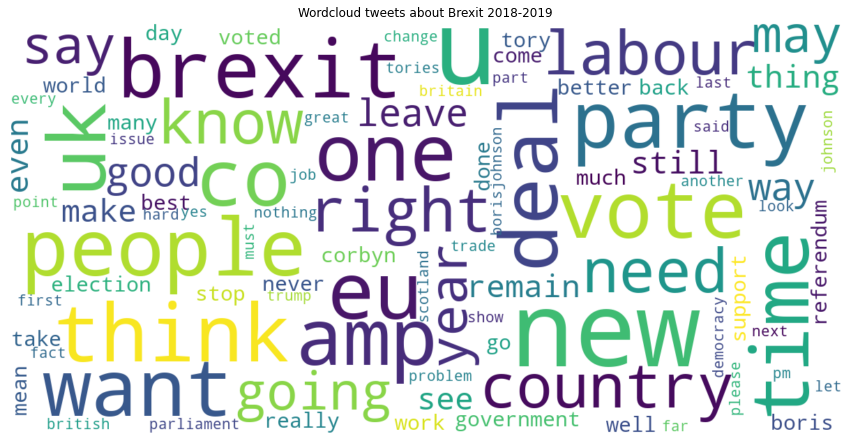

In [18]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud( max_font_size=50, max_words=100,scale=3,
                      background_color="white").generate(' '.join(clean_df_ncw['words']))
plt.figure()
plt.figure(figsize=(15,10))
title="Wordcloud tweets about Brexit 2018-2019"
plt.title(title)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(title+".png")

In [20]:
def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

df.reset_index(inplace = True)
df['Tweets_clean'] = df['Tweets_clean'].apply(str)
df_results = pd.DataFrame(sentimentScore(df['Tweets_clean']))
df=pd.merge(df, df_results, left_index=True, right_index=True)
df.set_index('Date', inplace=True)
df = df.sort_values('compound', ascending = False)
df

,User,Tweet,Date_time,day,month,year,Tweets_clean,neg,neu,pos,compound
Date,,,,,,,,,,,
2019-09-27,ht4ecosocialism,Oh We have to have a cheap shot about nobody...,2019-09-27 22:18:24+00:00,27.0,9.0,2019.0,Oh We cheap shot nobody know Labour position B...,0.000,0.158,0.842,0.9943
2018-08-16,talbertsmom,OMG OMG OMG I LOVE LOVE LOVE CBB I get most e...,2018-08-16 20:24:34+00:00,16.0,8.0,2018.0,OMG OMG OMG I LOVE LOVE LOVE CBB I get excited...,0.000,0.337,0.663,0.9933
2018-06-23,itsaybts,since it is already 24th of june in the uk I...,2018-06-23 23:04:09+00:00,23.0,6.0,2018.0,since already th june uk I want wish happy bir...,0.000,0.416,0.584,0.9932
2018-09-29,seblwts,IT ISN T YOUR BDAY IN THE UK YET BUT OH WELL ...,2018-09-29 21:05:04+00:00,29.0,9.0,2018.0,IT ISN T YOUR BDAY IN THE UK YET BUT OH WELL H...,0.000,0.436,0.564,0.9932
2018-08-19,nicktubechannel,Mrsshaw0607 marleybarclay21 Alfiethechamps ...,2018-08-19 20:39:13+00:00,19.0,8.0,2018.0,Mrsshaw marleybarclay Alfiethechamps team_lott...,0.030,0.384,0.585,0.9931
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,what_brexit_is,Brexit is a broken pisser s shockingly GFA vio...,2019-12-31 22:13:09+00:00,31.0,12.0,2019.0,Brexit broken pisser shockingly GFA violating ...,0.811,0.145,0.044,-0.9945
2019-08-17,sazmeister88,BorisJohnson NO DEAL BREXIT IS A BETRAYAL NO...,2019-08-17 18:46:22+00:00,17.0,8.0,2019.0,BorisJohnson NO DEAL BREXIT IS A BETRAYAL NO D...,0.643,0.357,0.000,-0.9949
2019-07-16,what_brexit_is,Brexit is a thousand broken death farce pukers...,2019-07-16 22:13:26+00:00,16.0,7.0,2019.0,Brexit thousand broken death farce pukers full...,0.783,0.217,0.000,-0.9957


In [21]:
df['polarity']=(df.pos-df.neg)/(df.pos+df.neg)
df

,User,Tweet,Date_time,day,month,year,Tweets_clean,neg,neu,pos,compound,polarity
Date,,,,,,,,,,,,
2019-09-27,ht4ecosocialism,Oh We have to have a cheap shot about nobody...,2019-09-27 22:18:24+00:00,27.0,9.0,2019.0,Oh We cheap shot nobody know Labour position B...,0.000,0.158,0.842,0.9943,1.000000
2018-08-16,talbertsmom,OMG OMG OMG I LOVE LOVE LOVE CBB I get most e...,2018-08-16 20:24:34+00:00,16.0,8.0,2018.0,OMG OMG OMG I LOVE LOVE LOVE CBB I get excited...,0.000,0.337,0.663,0.9933,1.000000
2018-06-23,itsaybts,since it is already 24th of june in the uk I...,2018-06-23 23:04:09+00:00,23.0,6.0,2018.0,since already th june uk I want wish happy bir...,0.000,0.416,0.584,0.9932,1.000000
2018-09-29,seblwts,IT ISN T YOUR BDAY IN THE UK YET BUT OH WELL ...,2018-09-29 21:05:04+00:00,29.0,9.0,2018.0,IT ISN T YOUR BDAY IN THE UK YET BUT OH WELL H...,0.000,0.436,0.564,0.9932,1.000000
2018-08-19,nicktubechannel,Mrsshaw0607 marleybarclay21 Alfiethechamps ...,2018-08-19 20:39:13+00:00,19.0,8.0,2018.0,Mrsshaw marleybarclay Alfiethechamps team_lott...,0.030,0.384,0.585,0.9931,0.902439
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,what_brexit_is,Brexit is a broken pisser s shockingly GFA vio...,2019-12-31 22:13:09+00:00,31.0,12.0,2019.0,Brexit broken pisser shockingly GFA violating ...,0.811,0.145,0.044,-0.9945,-0.897076
2019-08-17,sazmeister88,BorisJohnson NO DEAL BREXIT IS A BETRAYAL NO...,2019-08-17 18:46:22+00:00,17.0,8.0,2019.0,BorisJohnson NO DEAL BREXIT IS A BETRAYAL NO D...,0.643,0.357,0.000,-0.9949,-1.000000
2019-07-16,what_brexit_is,Brexit is a thousand broken death farce pukers...,2019-07-16 22:13:26+00:00,16.0,7.0,2019.0,Brexit thousand broken death farce pukers full...,0.783,0.217,0.000,-0.9957,-1.000000


/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


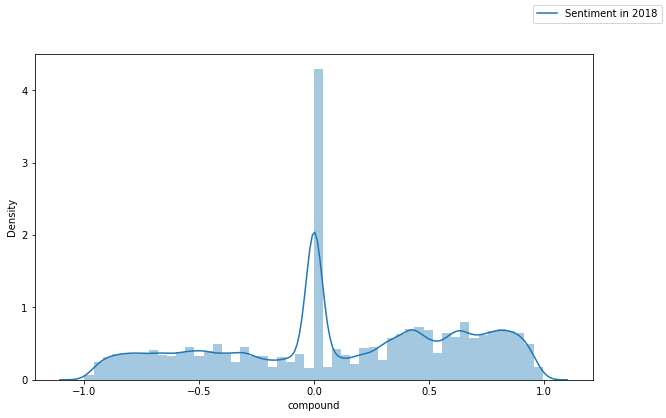

/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


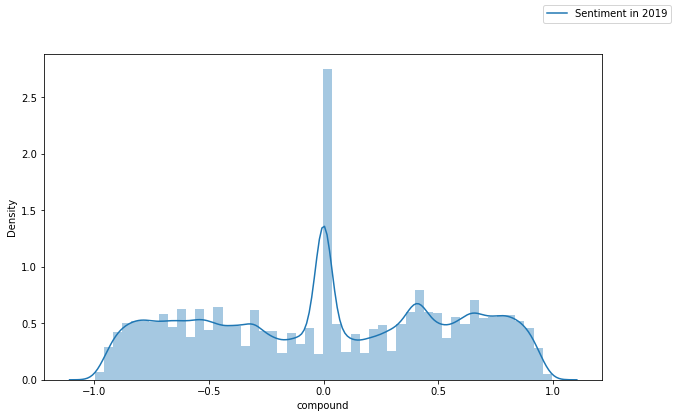

In [22]:
# plot sentiment distribution by Month

import seaborn as sns

fig = plt.figure(figsize=(10,6))
label = "Sentiment in 2018"
plot=df.loc[df['year'] == 2018]
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment in 2018"])
plt.show()

fig = plt.figure(figsize=(10,6))
label = "Sentiment in 2019"
plot=df.loc[df['year'] == 2019]
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment in 2019"])
plt.show()


In [23]:
df.index = pd.to_datetime(df.index)

#averages per month
sentiment=df['compound'].resample("m").mean()
polarity=df['polarity'].resample("m").mean()
sentiment

Date
2018-01-31    0.147410
2018-02-28    0.121874
2018-03-31    0.090686
2018-04-30    0.081265
2018-05-31    0.117205
2018-06-30    0.118626
2018-07-31    0.094055
2018-08-31    0.116347
2018-09-30    0.121921
2018-10-31    0.118446
2018-11-30    0.117010
2018-12-31    0.125789
2019-01-31   -0.026861
2019-02-28   -0.032163
2019-03-31   -0.040904
2019-04-30    0.021716
2019-05-31    0.083639
2019-06-30    0.032179
2019-07-31    0.015607
2019-08-31   -0.022971
2019-09-30    0.002897
2019-10-31    0.016654
2019-11-30    0.078174
2019-12-31    0.020071
Freq: M, Name: compound, dtype: float64

Populating the interactive namespace from numpy and matplotlib


/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot', 'text', 'title', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


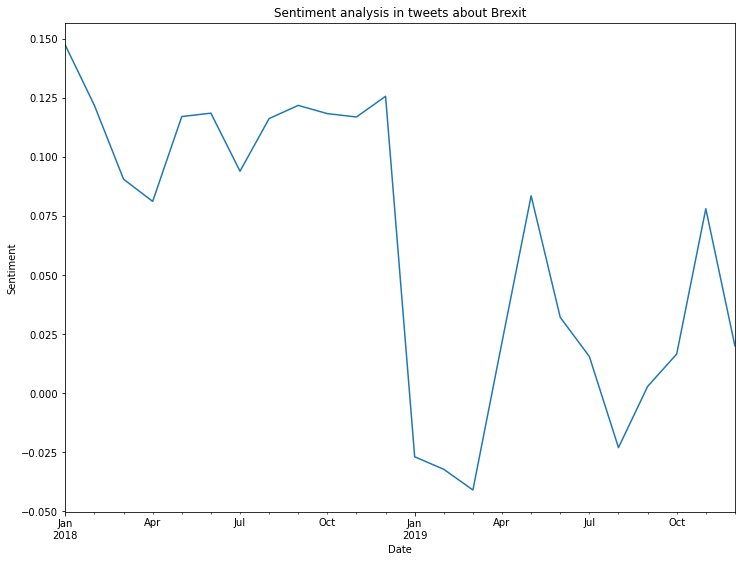

In [24]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 9) 

sentiment.plot()
plt.xlabel('Date')
plt.ylabel('Sentiment') 
plt.title('Sentiment analysis in tweets about Brexit') 
plt.show()

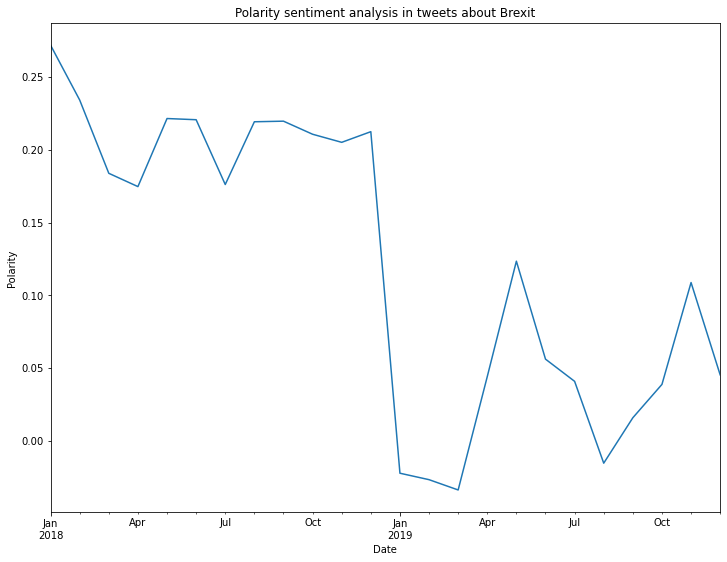

In [25]:
polarity.plot()
plt.xlabel('Date')
plt.ylabel('Polarity') 
plt.title('Polarity sentiment analysis in tweets about Brexit') 
plt.show()


In [27]:
df['Quarter'] = pd.cut(df['month'], [0,3,6,9,12], labels = [1,2,3,4])
df.head(10)

,User,Tweet,Date_time,day,month,year,Tweets_clean,neg,neu,pos,compound,polarity,Quarter
Date,,,,,,,,,,,,,
2019-09-27,ht4ecosocialism,Oh We have to have a cheap shot about nobody...,2019-09-27 22:18:24+00:00,27.0,9.0,2019.0,Oh We cheap shot nobody know Labour position B...,0.00,0.158,0.842,0.9943,1.000000,3
2018-08-16,talbertsmom,OMG OMG OMG I LOVE LOVE LOVE CBB I get most e...,2018-08-16 20:24:34+00:00,16.0,8.0,2018.0,OMG OMG OMG I LOVE LOVE LOVE CBB I get excited...,0.00,0.337,0.663,0.9933,1.000000,3
2018-06-23,itsaybts,since it is already 24th of june in the uk I...,2018-06-23 23:04:09+00:00,23.0,6.0,2018.0,since already th june uk I want wish happy bir...,0.00,0.416,0.584,0.9932,1.000000,2
2018-09-29,seblwts,IT ISN T YOUR BDAY IN THE UK YET BUT OH WELL ...,2018-09-29 21:05:04+00:00,29.0,9.0,2018.0,IT ISN T YOUR BDAY IN THE UK YET BUT OH WELL H...,0.00,0.436,0.564,0.9932,1.000000,3
2018-08-19,nicktubechannel,Mrsshaw0607 marleybarclay21 Alfiethechamps ...,2018-08-19 20:39:13+00:00,19.0,8.0,2018.0,Mrsshaw marleybarclay Alfiethechamps team_lott...,0.03,0.384,0.585,0.9931,0.902439,3
2018-12-14,angelslateryela,runr_uk omg i love these so much I use them ...,2018-12-14 21:12:34+00:00,14.0,12.0,2018.0,runr_uk omg love much I use headband yes pleas...,0.00,0.171,0.829,0.9926,1.000000,4
2018-12-02,superrrgnel,It was great to finally meet amp hug you be...,2018-12-02 21:07:44+00:00,2.0,12.0,2018.0,It great finally meet amp hug bexmader Dream c...,0.00,0.315,0.685,0.9922,1.000000,4
2018-09-25,nelikings01,It takes GOD for strength to attend 2 special ...,2018-09-25 23:31:30+00:00,25.0,9.0,2018.0,It take GOD strength attend special event Came...,0.00,0.368,0.632,0.9919,1.000000,3
2018-02-19,Donkiss_UK,Love is such a powerful thing It can heal in...,2018-02-19 23:50:41+00:00,19.0,2.0,2018.0,Love powerful thing It heal inspire amp break ...,0.00,0.355,0.645,0.9916,1.000000,1


In [30]:
final_df = df.groupby(['year','Quarter'])['polarity','compound'].mean()
final_df


<ipython-input-30-8e83e355a21f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df = df.groupby(['year','Quarter'])['polarity','compound'].mean()


polarity  compound
year   Quarter                    
2018.0 1        0.229794  0.120168
       2        0.205132  0.105429
       3        0.204807  0.110653
       4        0.209545  0.120548
2019.0 1       -0.027322 -0.033241
       2        0.075378  0.046260
       3        0.013849 -0.001585
       4        0.064387  0.038132

In [35]:
#2020 DATA
df2 = pd.read_csv("brexit_2020.csv")

df2['Tweet'] = df2['Tweet'].str.replace('\W', ' ', regex=True)

df2.loc[:,'Date'] = pd.to_datetime(df2.loc[:,'Date'], format="%Y-%m-%d %H:%M:%S")
df2['Date_time'] = pd.to_datetime(df2['Date'])
df2['Date'] = df2['Date'].dt.date
df2['Tweet'] = df2['Tweet'].apply(str)
df2['day'] = pd.DatetimeIndex(df2['Date']).day
df2['month'] = pd.DatetimeIndex(df2['Date']).month
df2['year'] = pd.DatetimeIndex(df2['Date']).year
df2=df2.dropna(axis=0)
df2=df2.set_index('Date')

df2= df2.sort_values("Date")
df2

,User,Tweet,Date_time,day,month,year
Date,,,,,,
2020-01-01,jimmtweet,Well folks happy new year can t believe I am ...,2020-01-01 00:00:09+00:00,1,1,2020
2020-01-01,SamuelM95019740,john_waterwood stejoco emilyhewertson the o...,2020-01-01 17:35:35+00:00,1,1,2020
2020-01-01,mark_vivian,VeeCee30 He needs to earn it after all of th...,2020-01-01 17:36:08+00:00,1,1,2020
2020-01-01,Gofindout1,thedsggroup It s very important though not to...,2020-01-01 17:36:17+00:00,1,1,2020
2020-01-01,gazatron13,MhehedZherting luketdclark The onus is on t...,2020-01-01 17:36:19+00:00,1,1,2020
...,...,...,...,...,...,...
2020-12-31,RBrexshit,Siftah gstewartbxl Puff83061278 BorisJohns...,2020-12-31 21:51:28+00:00,31,12,2020
2020-12-31,tempusultima,Nigel_Farage Brexit is a huge mistake You wi...,2020-12-31 21:51:51+00:00,31,12,2020
2020-12-31,CaltonHillEagle,When I first started blogging Brexit seemed i...,2020-12-31 21:51:52+00:00,31,12,2020


In [36]:
# Removing stop words
stop_words = stopwords.words("english")

df2['Tweets_clean'] = df2['Tweet'].apply(lambda x: ' '.join([item for item in x.split()
                                                                  if item not in stop_words]))
df2['Tweets_clean'] = df2['Tweets_clean'].str.replace('\d+', '')

df2["Tweets_clean"]

<ipython-input-36-d0fb69caa408>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Tweets_clean'] = df2['Tweets_clean'].str.replace('\d+', '')


Date
2020-01-01    Well folks happy new year believe I saying fin...
2020-01-01    john_waterwood stejoco emilyhewertson party ra...
2020-01-01    VeeCee He needs earn lies misdemeanours recent...
2020-01-01    thedsggroup It important though conflate suppo...
2020-01-01    MhehedZherting luketdclark The onus proposing ...
                                    ...                        
2020-12-31    Siftah gstewartbxl Puff BorisJohnson Agreed re...
2020-12-31    Nigel_Farage Brexit huge mistake You remembere...
2020-12-31    When I first started blogging Brexit seemed im...
2020-12-31    Hilarious Brexiters still think   million peop...
2020-12-31    Conservatives No If UK staying Single Market B...
Name: Tweets_clean, Length: 1048575, dtype: object

In [37]:
# TOKENIZATION
tt = TweetTokenizer()
df2['Tweets_clean'] = df2['Tweets_clean'].apply(str)
df2["Tweets_clean"] = df2["Tweets_clean"].apply(tt.tokenize)

lmtzr = WordNetLemmatizer()

df2["Tweets_clean"] = df2["Tweets_clean"].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])
df2['Tweets_clean'] = df2['Tweets_clean'].apply(str)
import re
p = re.compile(r'[^\w\s]+')
df2["Tweets_clean"] = [p.sub('', x) for x in df2["Tweets_clean"].tolist()]

#df["Tweets_clean"] = df["Tweets_clean"].str.replace('[^\w\s]','')
df2["Tweets_clean"]

Date
2020-01-01    Well folk happy new year believe I saying fina...
2020-01-01    john_waterwood stejoco emilyhewertson party ra...
2020-01-01    VeeCee He need earn lie misdemeanour recent mo...
2020-01-01    thedsggroup It important though conflate suppo...
2020-01-01    MhehedZherting luketdclark The onus proposing ...
                                    ...                        
2020-12-31    Siftah gstewartbxl Puff BorisJohnson Agreed re...
2020-12-31    Nigel_Farage Brexit huge mistake You remembere...
2020-12-31    When I first started blogging Brexit seemed im...
2020-12-31    Hilarious Brexiters still think million people...
2020-12-31    Conservatives No If UK staying Single Market B...
Name: Tweets_clean, Length: 1048575, dtype: object

In [38]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

df_no_urls = [remove_url(text) for text in df2['Tweets_clean']]
df_no_urls[:1]

lower_case = [word.lower() for word in df2['Tweets_clean']]
sentences = df2['Tweets_clean']

df_no_urls[0].split()

words_in_df = [text.lower().split() for text in df_no_urls]
words_in_df[:2]

[['well',
  'folk',
  'happy',
  'new',
  'year',
  'believe',
  'i',
  'saying',
  'finally',
  'leave',
  'eu',
  'month',
  'great',
  'country',
  'charge',
  'destiny',
  'looking',
  'forward',
  'already',
  'happy',
  'brexit',
  'day',
  'one',
  'st',
  'january'],
 ['johnwaterwood',
  'stejoco',
  'emilyhewertson',
  'party',
  'ran',
  'election',
  'single',
  'issue',
  'brexit',
  'party',
  'point',
  'invalid']]

In [39]:
# second cleaning 
stop_words = stopwords.words('english')
# Remove stop words from each list of words
df_nsw = [[word for word in df_words if not word in stop_words]
              for df_words in words_in_df]
df_nsw

[['well',
  'folk',
  'happy',
  'new',
  'year',
  'believe',
  'saying',
  'finally',
  'leave',
  'eu',
  'month',
  'great',
  'country',
  'charge',
  'destiny',
  'looking',
  'forward',
  'already',
  'happy',
  'brexit',
  'day',
  'one',
  'st',
  'january'],
 ['johnwaterwood',
  'stejoco',
  'emilyhewertson',
  'party',
  'ran',
  'election',
  'single',
  'issue',
  'brexit',
  'party',
  'point',
  'invalid'],
 ['veecee',
  'need',
  'earn',
  'lie',
  'misdemeanour',
  'recent',
  'month',
  'let',
  'start',
  'issuing',
  'russia',
  'report',
  'concluding',
  'acuri',
  'investigation',
  'let',
  'honest',
  'get',
  'brexit',
  'done',
  'mean',
  'show',
  'governing',
  'people'],
 ['thedsggroup',
  'important',
  'though',
  'conflate',
  'support',
  'eu',
  'socialism',
  'wokism',
  'corbynism',
  'ism',
  'brexit',
  'looking',
  'like',
  'great',
  'business',
  'plan',
  'yet',
  'soft',
  'landing',
  'expect',
  'lot',
  'disenchanted',
  'voter'],
 ['mhe

In [40]:
# Flatten list of words
all_words_nsw_nc = list(itertools.chain(*df_nsw))

# Create counter of words
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(20)

[('brexit', 1107391),
 ('co', 190678),
 ('http', 185372),
 ('uk', 177961),
 ('eu', 162834),
 ('deal', 134953),
 ('amp', 123855),
 ('people', 121042),
 ('get', 87123),
 ('one', 85323),
 ('u', 85195),
 ('like', 84976),
 ('think', 82860),
 ('government', 78226),
 ('would', 76381),
 ('covid', 73857),
 ('going', 71438),
 ('country', 70095),
 ('johnson', 64779),
 ('time', 63039)]

In [41]:
clean_df_ncw = pd.DataFrame(counts_nsw_nc.most_common(100),
                             columns=['words', 'count'])
clean_df_ncw

,words,count
0,brexit,1107391
1,co,190678
2,http,185372
3,uk,177961
4,eu,162834
...,...,...
95,always,21884
96,another,21825
97,already,21809
98,anti,21675


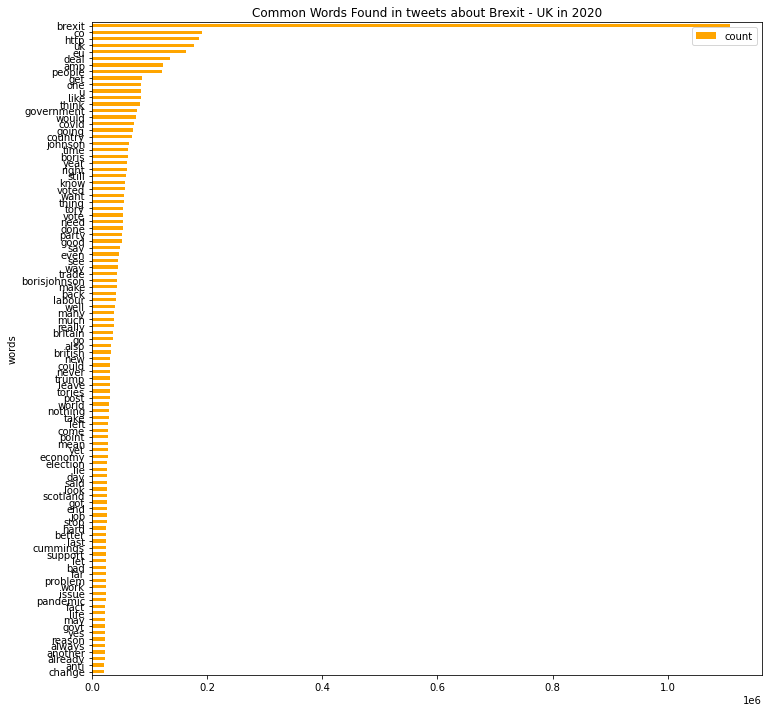

In [43]:
# plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
clean_df_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Words Found in tweets about Brexit - UK in 2020")

plt.show()

In [44]:
text = clean_df_ncw.iloc[:, 0]
text

0      brexit
1          co
2        http
3          uk
4          eu
       ...   
95     always
96    another
97    already
98       anti
99     change
Name: words, Length: 100, dtype: object

<Figure size 864x648 with 0 Axes>

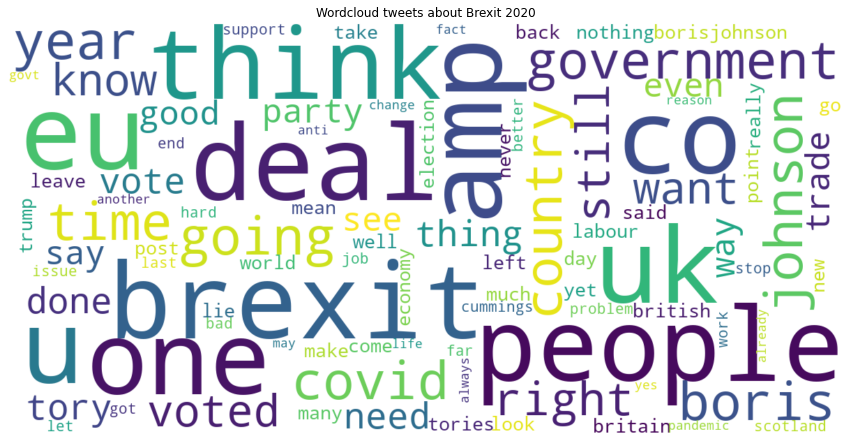

In [46]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud( max_font_size=50, max_words=100,scale=3,
                      background_color="white").generate(' '.join(clean_df_ncw['words']))
plt.figure()
plt.figure(figsize=(15,10))
title="Wordcloud tweets about Brexit 2020"
plt.title(title)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(title+".png")

In [47]:
def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

df2.reset_index(inplace = True)
df2['Tweets_clean'] = df2['Tweets_clean'].apply(str)
df2_results = pd.DataFrame(sentimentScore(df2['Tweets_clean']))
df2=pd.merge(df2, df2_results, left_index=True, right_index=True)
df2.set_index('Date', inplace=True)
df2 = df2.sort_values('compound', ascending = False)
df2

,User,Tweet,Date_time,day,month,year,Tweets_clean,neg,neu,pos,compound
Date,,,,,,,,,,,
2020-10-15,CorkytheCat747,KentishExpress This is not an opportunity fo...,2020-10-15 15:02:09+00:00,15,10,2020,KentishExpress This opportunity Remainers go B...,0.000,0.035,0.965,0.9989
2020-03-03,realworldrj,Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha h...,2020-03-03 11:40:16+00:00,3,3,2020,Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha h...,0.000,0.141,0.859,0.9977
2020-03-02,GavinCurnow,twlldun IS THAT FOR BREXIT OR THE CORONAVIRUS...,2020-03-02 08:37:49+00:00,2,3,2020,twlldun IS THAT FOR BREXIT OR THE CORONAVIRUS ...,0.000,0.185,0.815,0.9968
2020-10-17,TheFiftyist,BootstrapCook Brexit is a great time for me h...,2020-10-17 21:56:00+00:00,17,10,2020,BootstrapCook Brexit great time haha night sur...,0.000,0.141,0.859,0.9959
2020-10-17,worldofchris,BootstrapCook Brexit is a great day morning m...,2020-10-17 20:56:57+00:00,17,10,2020,BootstrapCook Brexit great day morning lovely ...,0.000,0.157,0.843,0.9940
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03,what_brexit_is,Brexit is one hundred and twenty tory pain pis...,2020-01-03 17:13:33+00:00,3,1,2020,Brexit one hundred twenty tory pain pisser fuc...,0.805,0.195,0.000,-0.9950
2020-10-25,what_brexit_is,Brexit is a painful fucked fucked fuck puking ...,2020-10-25 22:12:45+00:00,25,10,2020,Brexit painful fucked fucked fuck puking hurri...,0.846,0.154,0.000,-0.9951
2020-08-03,what_brexit_is,Brexit is a horrifically authoritarian plane c...,2020-08-03 05:12:55+00:00,3,8,2020,Brexit horrifically authoritarian plane crash ...,0.850,0.150,0.000,-0.9962


In [48]:
df2['polarity']=(df2.pos-df2.neg)/(df2.pos+df2.neg)
df2

,User,Tweet,Date_time,day,month,year,Tweets_clean,neg,neu,pos,compound,polarity
Date,,,,,,,,,,,,
2020-10-15,CorkytheCat747,KentishExpress This is not an opportunity fo...,2020-10-15 15:02:09+00:00,15,10,2020,KentishExpress This opportunity Remainers go B...,0.000,0.035,0.965,0.9989,1.000000
2020-03-03,realworldrj,Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha h...,2020-03-03 11:40:16+00:00,3,3,2020,Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha h...,0.000,0.141,0.859,0.9977,1.000000
2020-03-02,GavinCurnow,twlldun IS THAT FOR BREXIT OR THE CORONAVIRUS...,2020-03-02 08:37:49+00:00,2,3,2020,twlldun IS THAT FOR BREXIT OR THE CORONAVIRUS ...,0.000,0.185,0.815,0.9968,1.000000
2020-10-17,TheFiftyist,BootstrapCook Brexit is a great time for me h...,2020-10-17 21:56:00+00:00,17,10,2020,BootstrapCook Brexit great time haha night sur...,0.000,0.141,0.859,0.9959,1.000000
2020-10-17,worldofchris,BootstrapCook Brexit is a great day morning m...,2020-10-17 20:56:57+00:00,17,10,2020,BootstrapCook Brexit great day morning lovely ...,0.000,0.157,0.843,0.9940,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03,what_brexit_is,Brexit is one hundred and twenty tory pain pis...,2020-01-03 17:13:33+00:00,3,1,2020,Brexit one hundred twenty tory pain pisser fuc...,0.805,0.195,0.000,-0.9950,-1.000000
2020-10-25,what_brexit_is,Brexit is a painful fucked fucked fuck puking ...,2020-10-25 22:12:45+00:00,25,10,2020,Brexit painful fucked fucked fuck puking hurri...,0.846,0.154,0.000,-0.9951,-1.000000
2020-08-03,what_brexit_is,Brexit is a horrifically authoritarian plane c...,2020-08-03 05:12:55+00:00,3,8,2020,Brexit horrifically authoritarian plane crash ...,0.850,0.150,0.000,-0.9962,-1.000000


/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


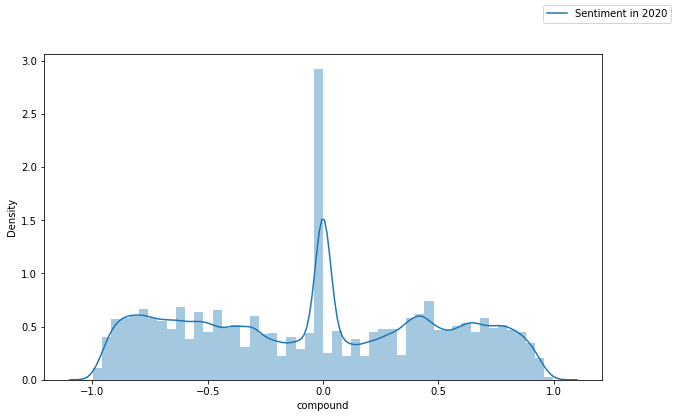

In [50]:
fig = plt.figure(figsize=(10,6))
label = "Sentiment in 2020"
plot=df2.loc[df2['year'] == 2020]
sns.distplot(plot['compound'], hist = True)
fig.legend(labels=["Sentiment in 2020"])
plt.show()

In [51]:
df2.index = pd.to_datetime(df2.index)

#averages per month
sentiment2=df2['compound'].resample("m").mean()
polarity2=df2['polarity'].resample("m").mean()
sentiment2

Date
2020-01-31    0.014436
2020-02-29         NaN
2020-03-31   -0.062006
2020-04-30   -0.071741
2020-05-31   -0.074018
2020-06-30   -0.063319
2020-07-31   -0.021856
2020-08-31   -0.045010
2020-09-30   -0.019913
2020-10-31   -0.010114
2020-11-30   -0.021206
2020-12-31   -0.003247
Freq: M, Name: compound, dtype: float64

Populating the interactive namespace from numpy and matplotlib


/Users/mocanugeorgiana/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text', 'title', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


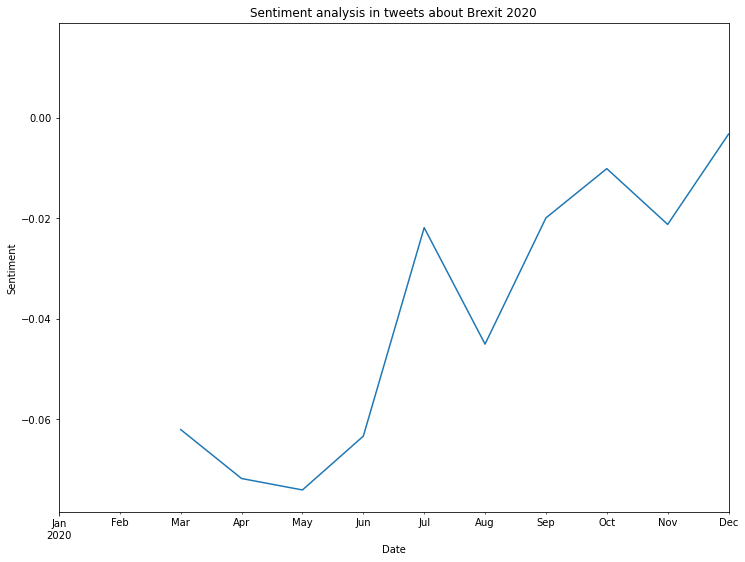

In [52]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 9) 

sentiment2.plot()
plt.xlabel('Date')
plt.ylabel('Sentiment') 
plt.title('Sentiment analysis in tweets about Brexit 2020') 
plt.show()

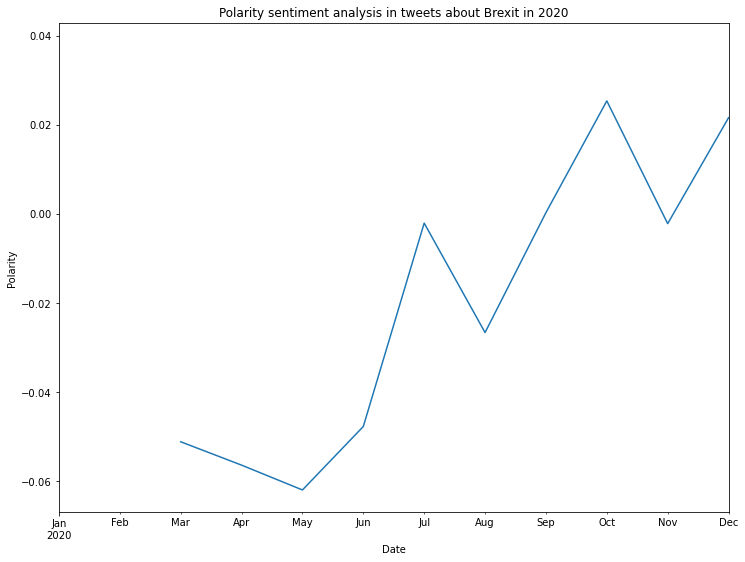

In [53]:
polarity2.plot()
plt.xlabel('Date')
plt.ylabel('Polarity') 
plt.title('Polarity sentiment analysis in tweets about Brexit in 2020') 
plt.show()

In [54]:
df2['Quarter'] = pd.cut(df2['month'], [0,3,6,9,12], labels = [1,2,3,4])
df2.head(10)

,User,Tweet,Date_time,day,month,year,Tweets_clean,neg,neu,pos,compound,polarity,Quarter
Date,,,,,,,,,,,,,
2020-10-15,CorkytheCat747,KentishExpress This is not an opportunity fo...,2020-10-15 15:02:09+00:00,15,10,2020,KentishExpress This opportunity Remainers go B...,0.000,0.035,0.965,0.9989,1.00000,4
2020-03-03,realworldrj,Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha h...,2020-03-03 11:40:16+00:00,3,3,2020,Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha h...,0.000,0.141,0.859,0.9977,1.00000,1
2020-03-02,GavinCurnow,twlldun IS THAT FOR BREXIT OR THE CORONAVIRUS...,2020-03-02 08:37:49+00:00,2,3,2020,twlldun IS THAT FOR BREXIT OR THE CORONAVIRUS ...,0.000,0.185,0.815,0.9968,1.00000,1
2020-10-17,TheFiftyist,BootstrapCook Brexit is a great time for me h...,2020-10-17 21:56:00+00:00,17,10,2020,BootstrapCook Brexit great time haha night sur...,0.000,0.141,0.859,0.9959,1.00000,4
2020-10-17,worldofchris,BootstrapCook Brexit is a great day morning m...,2020-10-17 20:56:57+00:00,17,10,2020,BootstrapCook Brexit great day morning lovely ...,0.000,0.157,0.843,0.9940,1.00000,4
2020-11-27,inselratte,Daily_Express Orders Barnier ha ha ha ha ha i...,2020-11-27 20:29:30+00:00,27,11,2020,Daily_Express Orders Barnier ha ha ha ha ha ea...,0.119,0.152,0.729,0.9928,0.71934,4
2020-10-18,pRoBlEmAtiC_BXP,nickreeves9876 But the top people behind Rema...,2020-10-18 12:57:34+00:00,18,10,2020,nickreeves But top people behind Remain super ...,0.000,0.413,0.587,0.9920,1.00000,4
2020-10-17,kellyatgrafik,BootstrapCook Brexit is a time to get some go...,2020-10-17 13:55:07+00:00,17,10,2020,BootstrapCook Brexit time get good rest little...,0.000,0.222,0.778,0.9905,1.00000,4
2020-10-20,laraameliajak,BootstrapCook Brexit is a time to place the C...,2020-10-20 21:34:35+00:00,20,10,2020,BootstrapCook Brexit time place Christmas part...,0.000,0.368,0.632,0.9897,1.00000,4


In [55]:
final_df2 = df2.groupby(['year','Quarter'])['polarity','compound'].mean()
final_df2

<ipython-input-55-6c1359c85b10>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df2 = df2.groupby(['year','Quarter'])['polarity','compound'].mean()


polarity  compound
year Quarter                    
2020 1       -0.019910 -0.035221
     2       -0.055068 -0.069343
     3       -0.008532 -0.028118
     4        0.015119 -0.011421

In [57]:
frames=(final_df,final_df2)
all_year_df = pd.concat(frames)
all_year_df

polarity  compound
year   Quarter                    
2018.0 1        0.229794  0.120168
       2        0.205132  0.105429
       3        0.204807  0.110653
       4        0.209545  0.120548
2019.0 1       -0.027322 -0.033241
       2        0.075378  0.046260
       3        0.013849 -0.001585
       4        0.064387  0.038132
2020.0 1       -0.019910 -0.035221
       2       -0.055068 -0.069343
       3       -0.008532 -0.028118
       4        0.015119 -0.011421

In [58]:
all_year_df.to_csv("brexit_data.csv")

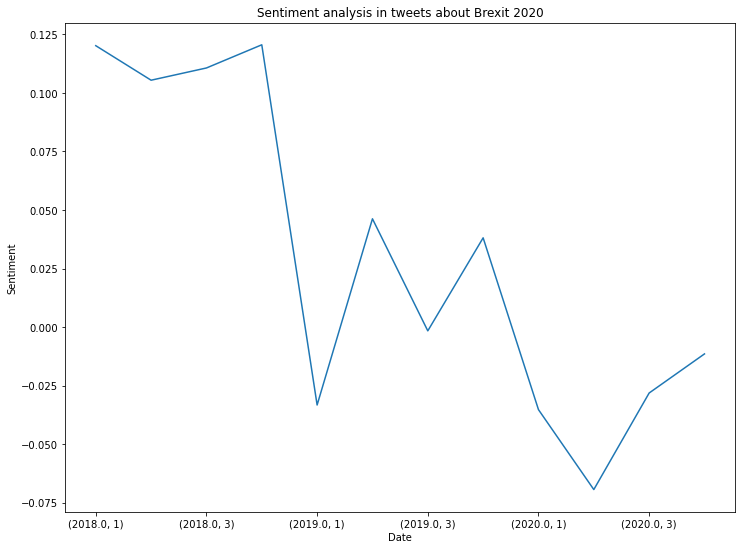

In [59]:
pylab.rcParams['figure.figsize'] = (12, 9) 

all_year_df['compound'].plot()
plt.xlabel('Date')
plt.ylabel('Sentiment') 
plt.title('Sentiment analysis in tweets about Brexit 2018-2020') 
plt.show()

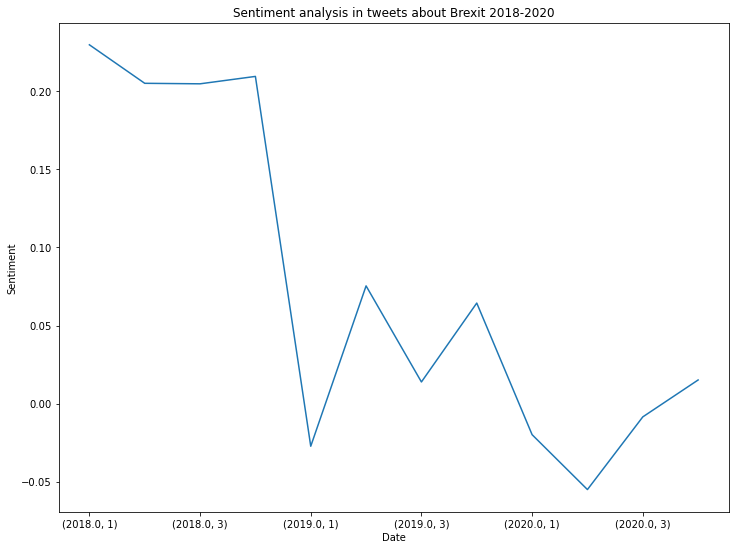

In [60]:
pylab.rcParams['figure.figsize'] = (12, 9) 

all_year_df['polarity'].plot()
plt.xlabel('Date')
plt.ylabel('Sentiment') 
plt.title('Sentiment analysis in tweets about Brexit 2018-2020') 
plt.show()